# Evaluating the Performance of MiDaS on Drone Data
---

In [1]:
bag_file_name = 'test3.bag'

## Getting drone footage

In [2]:
import os
import rosbag
import MiDaS.bag2data as b2d

bag = rosbag.Bag(os.path.join('MiDaS/drone_data', bag_file_name))

# get data from rosbag
image_data_infra1_ros = b2d.getImageData(bag, '/d455/infra1/image_rect_raw')
image_data_infra2_ros = b2d.getImageData(bag, '/d455/infra2/image_rect_raw')

# transform data into list of numpy arrays/matrices
image_data_infra1_np = b2d.ros2numpy(image_data_infra1_ros)
image_data_infra2_np = b2d.ros2numpy(image_data_infra2_ros)

print("The bags contain", len(image_data_infra1_np), "and", len(image_data_infra2_np), "Frames.")

The bags contain 843 and 840 Frames.


## Estimating depth in drone footage

TypeError: Image data of dtype object cannot be converted to float

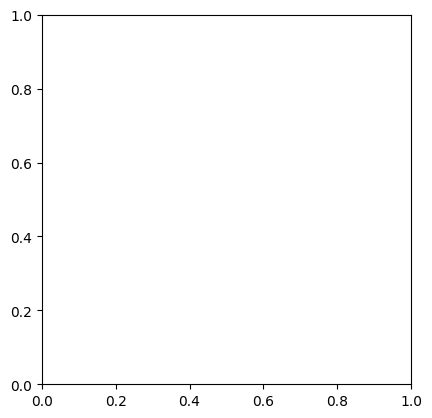

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import MiDaS.run


# run MiDaS on data from rosbag
# python ./MiDaS/run.py --model_type dpt_beit_large_512 --input_path input --output_path output
input_path = 'input'
output_path = 'output'
model_path = 'weights/dpt_beit_large_512.pt'
model_type = 'dpt_beit_large_512'
optimize=False
side=False
height=None
square=False
grayscale=True # Realsense output is grayscale
MiDaS.run.run(input_path, output_path, model_path, model_type, optimize, side, height, square, grayscale):




img = cv2.imread('MiDaS\\output\\0-dpt_beit_large_512.png')
plt.imshow(img) # cmap='gray'
plt.show()


ind_max = np.unravel_index(np.argmax(img, axis=None), img.shape)
print(ind_max)  # returns a tuple
ind_min = np.unravel_index(np.argmin(img, axis=None), img.shape)
print(ind_min)  # returns a tuple

## Getting "real" depth from Intel Realsense

## Comparing estimation to "ground truth"

## Results